# Final HW: Problem 2
## Gravitational Orbits in Cartesian Coordinates

Implements a CartesianOrbit Class which is then used to solve Lagrange's equations and generate
some basic plots for a two-body gravitational orbit system.

* Last revised 1-May-2021 by Nathan Lachner (lachner.3@osu.edu).

To begin, lets get a basic look at a two-body orbital system, as shown in our Textbook (page 295)
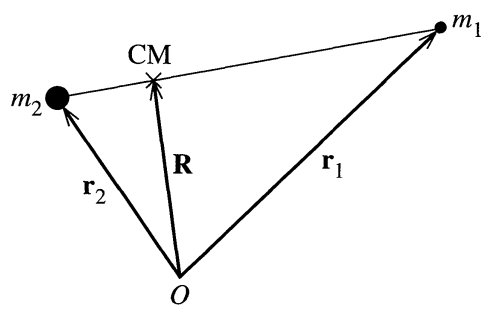

This suggests our approach to this problem. Importantly, we work in the CM frame throughout, placing the origin at the CM, s.t. $\boldsymbol{r_1}$ and $\boldsymbol{r_2}$ point in opposite directions. We'll end up using this fact later.

Since we intend to work in Cartesian coordinates, we let $\boldsymbol{r_1} = (x_1, y_1)$ and $\boldsymbol{r_2} = (x_2, y_2)$. These coordinates are independent, so their derivatives are very conveniently $\boldsymbol{\dot r_1} = (\dot x_1, \dot y_1)$ and $\boldsymbol{\dot r_2} = (\dot x_2, \dot y_2)$.

With this information in hand we can immediately write the kinetic energy of the system:

$\begin{align}
    T &=  \frac{1}{2}m_1 \boldsymbol{\dot r_1}^2 + \frac{1}{2}m_2 \boldsymbol{\dot r_2}^2 = \frac{1}{2}m_1(\dot x_1^2 + \dot y_1^2) + \frac{1}{2}m_2(\dot x_2^2 + \dot y_2^2)
\end{align}$
<br>

As for the potential energy, we're working here with gravitational potential energy, given by: <br> <br>
$\begin{align}U(\boldsymbol{r_1}, \boldsymbol{r_2}) = \frac{-G m_1 m_2}{|\boldsymbol{r_1} - \boldsymbol{r_2}|} \end{align}$ <br> <br>
Which we can write in terms of our Cartesian coordinates as: <br> <br>
$\begin{align}U(x_1, y_1, x_2, y_2) = \frac{-G m_1 m_2}{\sqrt{(x_1 - x_2)^2 + (y_1 - y_2)^2}} \end{align}$ <br>

This gives us a Lagrangian, $\mathcal{L} = T - U$: <br>

$\begin{align}\mathcal{L} = \frac{1}{2}m_1(\dot x_1^2 + \dot y_1^2) + \frac{1}{2}m_2(\dot x_2^2 + \dot y_2^2) + \frac{G m_1 m_2}{\sqrt{(x_1 - x_2)^2 + (y_1 - y_2)^2}}\end{align}$
<br>

We can now plug this into the Euler-Lagrange Equations: <br>

$\begin{align}
\frac{d}{dt}\frac{\partial\mathcal{L}}{\partial \dot q_i} = \frac{\partial\mathcal L}{\partial q_i}
\end{align}$

Where $q_i = x_1, y_1, x_2, y_2$ <br>

After some calculus (thanks again Mathematica!), we obtain the four equations of motion: <br>

$\begin{align}m_1 \ddot x_1 = \frac{-G m_1 m_2 (x_1 - x_2)}{((x_1 - x_2)^2 + (y_1 - y_2)^2)^{3/2}}\end{align}$ <br> <br>
$\begin{align}m_1 \ddot y_1 = \frac{-G m_1 m_2 (y_1 - y_2)}{((x_1 - x_2)^2 + (y_1 - y_2)^2)^{3/2}}\end{align}$ <br> <br>
$\begin{align}m_2 \ddot x_2 = \frac{G m_1 m_2 (x_1 - x_2)}{((x_1 - x_2)^2 + (y_1 - y_2)^2)^{3/2}}\end{align}$ <br> <br>
$\begin{align}m_2 \ddot y_2 = \frac{G m_1 m_2 (y_1 - y_2)}{((x_1 - x_2)^2 + (y_1 - y_2)^2)^{3/2}}\end{align}$ <br> <br>

While certainly more visually tractable than those of Problem 1, I still find the matrix form useful, both visually and computationally, so let's rewrite these in matrix form, $\textbf{A}\boldsymbol{\ddot x} = c \; \textbf{b}$, with: <br> 

$\begin{align}
\textbf{A} = \begin{pmatrix} m_1 & 0 & 0 & 0 \\ 0 & m_1 & 0 & 0 \\ 0 & 0 & m_2 & 0 \\ 0 & 0 & 0 & m_2 \\ \end{pmatrix}, \quad
\boldsymbol{\ddot x} = \left(\begin{array}{c} \ddot x_1 \\ \ddot y_1 \\ \ddot x_2 \\ \dot y_2 \\ \end{array}\right), \quad 
c = \frac{G m_1 m_2}{((x_1 - x_2)^2 + (y_1 - y_2)^2)^{3/2}}, \quad 
\textbf{b} = \left(\begin{array}{c} -(x_1 - x_2) \\ -(y_1 - y_2) \\ (x_1 - x_2) \\ (y_1 - y_2) \\ \end{array}\right) \end{align}$ <br>

We can then solve for $\boldsymbol{\ddot x}$ via inverting $\textbf{A}$: $\quad\boldsymbol{\ddot x} = \textbf{A}^{-1} (c \; \textbf{b})$ <br>

This is effectively the equation our CartesianOrbit class will need to implement. Just as with the DoublePendulum, however,  the ODE solver within scipy, solve_ivp, requires our equation to be in the form of a coupled system of first-order differential equations. This is easily remedied by introducing the vector: <br>

$\textbf{r} = \left(\begin{array}{c} x_1 \\ y_1 \\ x_2 \\ y_2 \\ \dot x_1 \\ \dot y_1 \\ \dot x_2 \\ \dot y_2 \end{array}\right) \;$ where 
$\begin{align}\frac{d\mathbf{r}}{dt} = \end{align}
\left(\begin{array}{c} \dot x_1 \\ \dot y_1 \\ \dot x_2 \\ \dot y_2 \\ \ddot x_1 \\ \ddot y_1 \\ \ddot x_2 \\ \ddot y_2 \\   \end{array}\right)$ <br>

With this vector, we can treat our system of four coupled second-order ODEs as a system of eight coupled first-order ODE's, where the extra four equations are simply: <br>

$\begin{align}
\dot x_1 = \frac{dx_1}{dt}, \; \dot y_1 = \frac{dy_1}{dt}, \; \dot x_2 = \frac{dx_2}{dt}, \; \dot y_2 = \frac{dy_2}{dt}
\end{align}$ <br>

We now can proceed with implementation.

In [1]:
# set matplotlib to print graphs inline
%matplotlib inline

# import the necessary libraries
import numpy as np
from scipy.integrate import solve_ivp
from scipy import linalg as LA
import matplotlib.pyplot as plt

# increase the matplotlib font size for readability
fontSize = 14
plt.rcParams.update({'font.size': fontSize})

In [2]:
class CartesianOrbit():
    """
    Implements the parameters and Lagrange's equations for a two-body gravitational 
     orbital system in the CM frame, using Cartesian coordinates.
     
    Parameters
    ----------
    m1 : float
        mass of the first body
    m2 : float
        mass of the second body
    G : float
        constant of gravitation
    """
    
    def __init__(self, m1=1., m2=1., G=6.67430e-11):
        self.m1 = m1
        self.m2 = m2
        self.G = G
        
    def dr_dt(self, t, r):
        """
        Returns the right-hand side of the diffeq: 
        [dx1/dt, dy1/dt, dx2/dt, dy2/dt, d^2x1/dt^2, d^2y1/dt^2, d^2x2/dt^2, d^2y2/dt^2]
    
        Parameters
        ----------
        t : float
            time 
        r : float
            The vector [x1, y1, x2, y2, dx1/dt, dy1/dt, dx2/dt, dy2/dt]
            
        Methods
        -------
        dr_dt(t, r)
            Returns the right-hand side of the differential equation in vector
            r = [x1, y1, x2, y2, dx1/dt, dy1/dt, dx2/dt, dy2/dt], 
            given the time t and corresponding value of r.
    
        solve_ode(tPts, phi0, phiDot0, method, abserr, relerr)
            Solves the differential equation in vector r over the time steps tPts,
            using initial conditions pos0 and vel0, solution method "method", and
            with absolute error bound abserr and relative error bound relerr.
        """
        
        # create the matrix from the lhs of the equation
        A_matrix = np.array([ [self.m1, 0., 0., 0.], [0., self.m1, 0., 0.], 
                             [0., 0., self.m2, 0.], [0., 0., 0., self.m2] ])
        
        # compute the coefficient from the rhs of the equation
        rhsCoef = (self.G * self.m1 * self.m2) / (((r[0] - r[2])**2 + (r[1] - r[3])**2)**(3/2))
        
        # create the vector from the rhs of the equation
        rhsVec = np.array([-1. * rhsCoef * (r[0] - r[2]), 
                           -1. * rhsCoef * (r[1] - r[3]),
                           rhsCoef * (r[0] - r[2]),
                           rhsCoef * (r[1] - r[3])])
        
        # initialize the derivative vector
        dr_dtVec = np.zeros(8)
        
        # set the upper half of dr_dt (the first derivative) to the lower half of r
        dr_dtVec[:4] = r[4:]
        
        # set the lower half of dr_dt (the second derivative) to the result of 
        #  applying A^-1 to the rhs of the equation
        dr_dtVec[4:] = LA.inv(A_matrix) @ rhsVec
        
        return dr_dtVec
        
        
    def solve_ode(self, tPts, pos0, vel0, method='RK45', abserr=1.0e-10, relerr=1.0e-10):
        """
        Solves the two-body orbital diffeq with given initial conditions, pos0 and vel0.
        Uses solve_ivp with option to speicify the solution method and error bounds.
        """
        
        # build the vector r = [x1, y1, x2, y2, dx1/dt, dy1/dt, dx2/dt, dy2/dt]
        #                    = [pos0, vel0] 
        r = np.concatenate((pos0, vel0))
        
        # run solve_ivp to numerically solve the diffeq
        solution = solve_ivp(self.dr_dt, (tPts[0], tPts[-1]), r, t_eval=tPts, method=method, atol=abserr, rtol=relerr)
        
        # split the solution back into parts for pos and vel
        pos, vel = np.array_split(solution.y, 2)
        
        return pos, vel

With the class now in hand we can proceed to generate some plots with it. We will begin with simply each coordinate as a function of time for some simple initial conditions. 

To do this, however, we need to make sure our initial conditions place us in the CM frame. We can handle this pretty simply by noting that we need to specify eight initial conditions, four position coordinates and four velocity coordinates (since $\textbf{r}$ has eight components), but our system only has four degrees of freedom. That means four of these initial conditions are technically extraneous, and we can determine them from the other four. 

Let's look at how the CM-position is determined for a general coordinate system. Specifically, lets do each axis separately, since the Cartesian axes are independent from one another. First up, the x-axis:

$\begin{align} CM_x = \frac{m_1 x_1 + m_2 x_2}{m_1 + m_2} \end{align}$

Now let's solve for $x_2$:

$\begin{align} x_2 = \frac{(m_1 + m_2)CM_x - m_1 x_1}{m_2} \end{align}$

But, remember, in our system, we've placed the CM at the origin and we're in the CM frame. Thus $CM_x = 0$ at all times, and we obtain the relation:

$\begin{align} x_2 = -\frac{m_1}{m_2} x_1 \end{align}$

Differentiating both sides with respect to time, we also have:

$\begin{align} \dot x_2 = -\frac{m_1}{m_2} \dot x_1 \end{align}$

And, finally, an indentical process gives us the following relations for the y-coordinates:

$\begin{align} y_2 = -\frac{m_1}{m_2} y_1, \; \dot y_2 = -\frac{m_1}{m_2} \dot y_1 \end{align}$

With these four relations in hand, we can ensure that we're always in the CM frame by determining the initial conditions for the second body entirely from those for the first. Since our derivation of the equations of motion above assumed we were in the CM frame, by starting in the CM frame, we're guaranteed to stay there. We implement this below, and generate the afforementioned plots.

[ 1.  0. -1. -0.] [ 0.  1. -0. -1.]


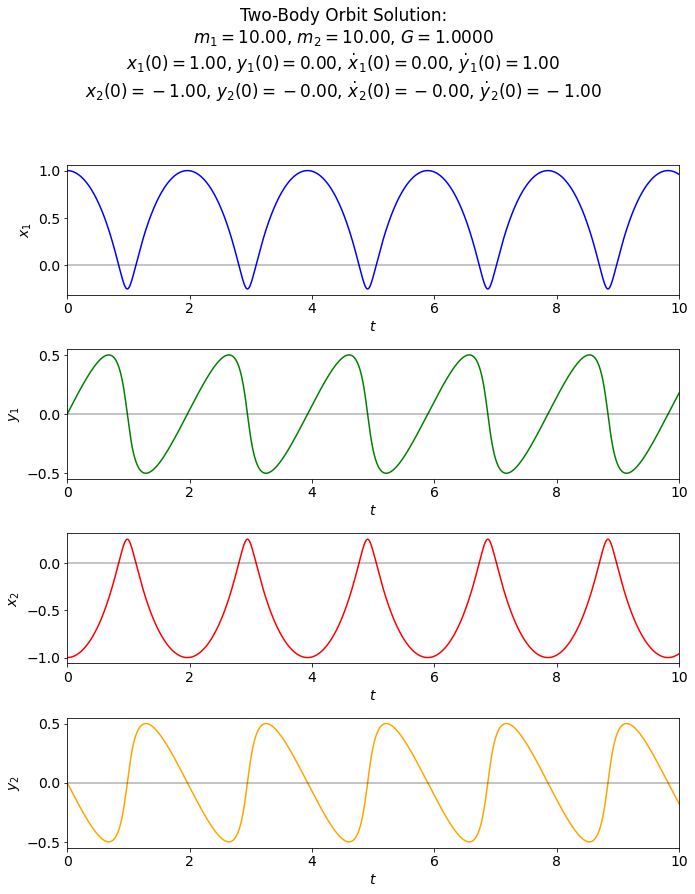

In [3]:
# sample values for two-body parameters
m1 = 10.
m2 = 10.

# let's give this a nice and simple scaling factor
G = 1.

# generate two-body orbit instance
co1 = CartesianOrbit(m1, m2, G)

# generate time lattice
tStart = 0.
tEnd = 10.
deltaT = 0.001
tPts = np.arange(tStart, tEnd+deltaT, deltaT)

# set up initial conditions for the two-body system
x1_0 = 1.0
y1_0 = 0.0
x1Dot_0 = 0.0
y1Dot_0 = 1.0

# this definition for body 2 ensures we're in the CM frame
x2_0 = -(m1 / m2) * x1_0
y2_0 = -(m1 / m2) * y1_0
x2Dot_0 = -(m1 / m2) * x1Dot_0
y2Dot_0 = -(m1 / m2) * y1Dot_0

pos0 = np.array([x1_0, y1_0, x2_0, y2_0])
vel0 = np.array([x1Dot_0, y1Dot_0, x2Dot_0, y2Dot_0])

# solve diffeq
pos, vel = co1.solve_ode(tPts, pos0, vel0)


# plot the each of the coordinates vs. time
colors = ['blue', 'green', 'red', 'orange']

fig, axes = plt.subplots(4, 1, figsize=(10, 12))
for j in np.arange(4):
    axes[j].plot(tPts, pos[j], color=colors[j])
    axes[j].set_xlabel(r'$t$')
    axes[j].set_xlim(tPts[0], tPts[-1])
    axes[j].axhline(0., color='black', alpha=0.3)

axes[0].set_ylabel(fr'$x_1$')
axes[1].set_ylabel(fr'$y_1$')
axes[2].set_ylabel(fr'$x_2$')
axes[3].set_ylabel(fr'$y_2$')

overallTitle = 'Two-Body Orbit Solution:\n' + fr'$m_1 = {m1:.2f}$, ' + \
                                        fr'$m_2 = {m2:.2f}$, ' + \
                                        fr'$G = {G:.4f}$' + '\n' + \
                                        fr'$x_1(0) = {pos0[0]:.2f}$, ' + \
                                        fr'$y_1(0) = {pos0[1]:.2f}$, ' + \
                                        fr'$\dotx_1(0) = {vel0[0]:.2f}$, ' + \
                                        fr'$\doty_1(0) = {vel0[1]:.2f}$' + '\n' + \
                                        fr'$x_2(0) = {pos0[2]:.2f}$, ' + \
                                        fr'$y_2(0) = {pos0[3]:.2f}$, ' + \
                                        fr'$\dotx_2(0) = {vel0[2]:.2f}$, ' + \
                                        fr'$\doty_2(0) = {vel0[3]:.2f}$'
fig.suptitle(overallTitle, va='center')

fig.tight_layout()

print( pos0, vel0 )  # debugging check

Now, just looking at these it is difficult to tell what sort of orbital system we've ended up with, but a few notable details do arise. For one, the graphs are clearly periodic with a shared period, so whatever pattern we have is a closed orbital system, which is what we expect for the gravitational potential. For another, notice that $x_2$ is a reflection of $x_1$ across the time-axis, and same for $y_2$ and $y_1$. This is reflective of our choice to work in the CM frame, and that the two masses are equal in this example. Finally, the fact that these aren't sinusoids leads me to believe that our orbits here are ellipses.

Of course, the orbits are what we're really after, so let's plot them next. This requires that we plot just the positions as parametrized by the time.

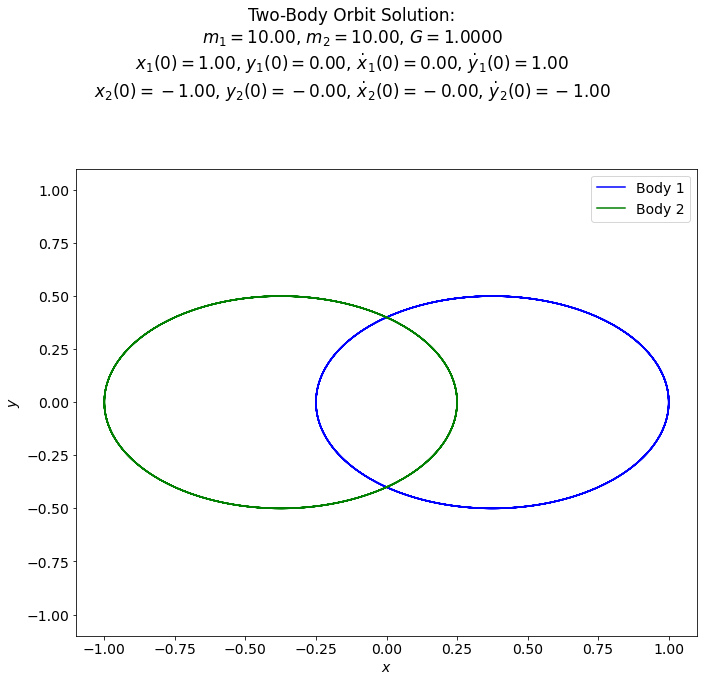

In [4]:
# plot the orbits themselves
fig = plt.figure(figsize=(10, 9))

ax = fig.add_subplot(1,1,1)
ax.set_xlabel(r'$x$')
ax.set_ylabel(fr'$y$')
ax.set_xlim(-1.1, 1.1)
ax.set_ylim(-1.1, 1.1)

ax.plot(pos[0], pos[1], color='blue', label=rf'Body 1')
ax.plot(pos[2], pos[3], color='green', label=rf'Body 2')
ax.legend()

overallTitle = 'Two-Body Orbit Solution:\n' + fr'$m_1 = {m1:.2f}$, ' + \
                                        fr'$m_2 = {m2:.2f}$, ' + \
                                        fr'$G = {G:.4f}$' + '\n' + \
                                        fr'$x_1(0) = {pos0[0]:.2f}$, ' + \
                                        fr'$y_1(0) = {pos0[1]:.2f}$, ' + \
                                        fr'$\dotx_1(0) = {vel0[0]:.2f}$, ' + \
                                        fr'$\doty_1(0) = {vel0[1]:.2f}$' + '\n' + \
                                        fr'$x_2(0) = {pos0[2]:.2f}$, ' + \
                                        fr'$y_2(0) = {pos0[3]:.2f}$, ' + \
                                        fr'$\dotx_2(0) = {vel0[2]:.2f}$, ' + \
                                        fr'$\doty_2(0) = {vel0[3]:.2f}$'
fig.suptitle(overallTitle, va='center')

fig.tight_layout()

It turns out that, yes, we do have elliptical orbits here. Note, the CM, at the origin, is inside both orbits, as we expect. And, since the masses here are equal, one orbit is just the reflection of the other through the origin. Therefore, though the paths may intersect, the masses will never collide.


Now, then, what about the situation where the masses aren't equal? Well, let's suppose that we let $m_2$ grow while we keep $m_1$ fixed. Since our above relations between the positions and velocities of the two bodies hold for all times, we can use them to predict what should happen. We, have, again:

$\begin{align} x_2 = -\frac{m_1}{m_2} x_1, \; \dot x_2 = -\frac{m_1}{m_2} \dot x_1, \; y_2 = -\frac{m_1}{m_2} y_1, \; \dot y_2 = -\frac{m_1}{m_2} \dot y_1 \end{align}$

In all four of these expressions, the limit is the same as we let $m_2$ grow. $x_2,\; \dot x_2,\; y_2,\; \dot y_2 \rightarrow 0$


Thus, as body 2 becomes much heavier than body 1, the system should approach the behavior of a single body of mass $m_1$ orbiting about a fixed point of mass $m_2$ located at the origin. This makes sense, since as $m_2$ grows, it more and more heavily determines the CM. The CM therefore moves closer and closer to body 2, dragging the rest frame along with it.

With this analysis in mind, let's implement it into our code and see if we're right.

In [5]:
# two-body parameters, with increasingly large values for m2
m1 = 2.0
m2 = np.array([5.0, 10.0, 20.0, 50.0, 75.0, 100.0])

# let's give this a nice and simple scaling factor
G = 1.

# generate the two-body orbit instances
coList = []
for i in np.arange(len(m2)):
    coList.append(CartesianOrbit(m1, m2[i], G))

# generate time lattice
tStart = 0.
tEnd = 15.
deltaT = 0.001
tPts = np.arange(tStart, tEnd+deltaT, deltaT)

# set up initial conditions for body 1
x1_0 = 1.0
y1_0 = 1.0
x1Dot_0 = 1.1
y1Dot_0 = -1.1

# generate initial conditions for each of the body 2's
x2_0 = -(m1 / m2) * x1_0
y2_0 = -(m1 / m2) * y1_0
x2Dot_0 = -(m1 / m2) * x1Dot_0
y2Dot_0 = -(m1 / m2) * y1Dot_0

# compose initial conditions into lists
pos0 = []
vel0 = []
for i in np.arange(len(m2)):
    pos0.append(np.array([x1_0, y1_0, x2_0[i], y2_0[i]]))
    vel0.append(np.array([x1Dot_0, y1Dot_0, x2Dot_0[i], y2Dot_0[i]]))
    
#solve diffeqs
pos = []
vel = []
for i in np.arange(len(m2)):
    tempPos, tempVel = coList[i].solve_ode(tPts, pos0[i], vel0[i])
    pos.append(tempPos)
    vel.append(tempVel)

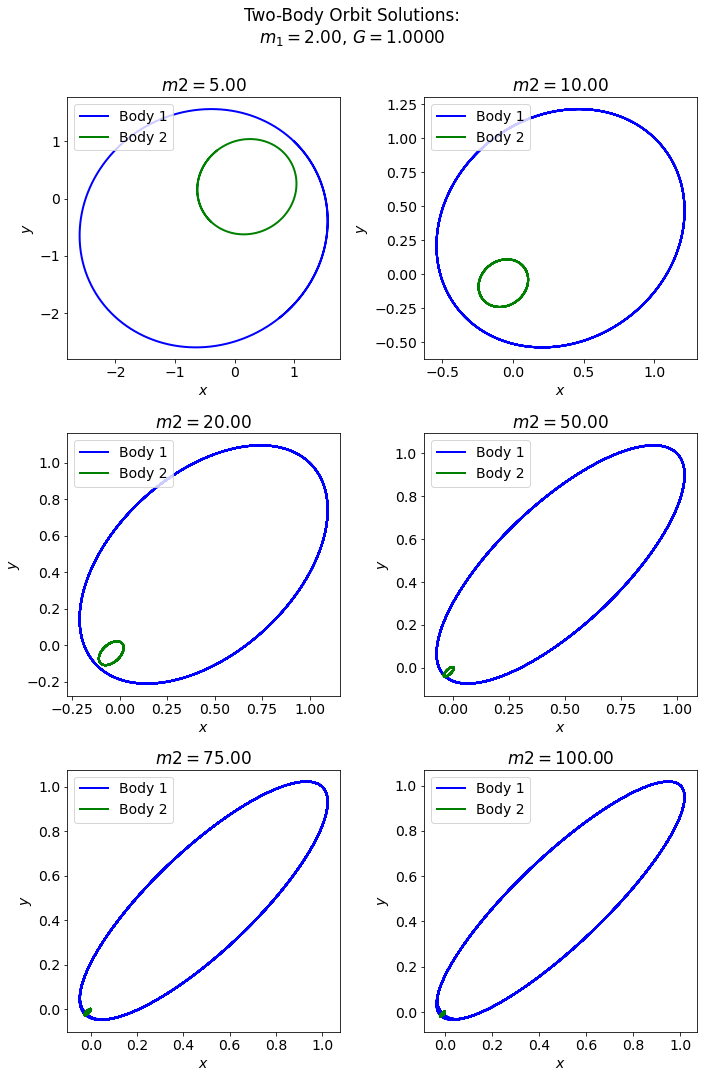

In [6]:
# plot the orbits
fig_array = plt.figure(figsize=(10, 15), num='Two Body Orbits')

for i in np.arange(len(m2)):
    ax_array = fig_array.add_subplot(3, 2, i+1)
    ax_array.set_xlabel(r'$x$')
    ax_array.set_ylabel(r'$y$')
    ax_array.set_title(rf'$m2 = {m2[i]:.2f}$')
    
    ax_array.plot(pos[i][0], pos[i][1], color='blue', lw=2, label='Body 1')
    ax_array.plot(pos[i][2], pos[i][3], color='green', lw=2, label='Body 2')
    ax_array.legend(loc='upper left')

overallTitle = 'Two-Body Orbit Solutions:\n' + fr'$m_1 = {m1:.2f}$, ' + \
                                        fr'$G = {G:.4f}$'
fig_array.suptitle(overallTitle, va='center')    

fig_array.tight_layout()


Success! As expected, when $m_2$ is relatively close to $m_1$, both masses move appreciably in their orbits. But as $m_2$ grows while $m_1$ remains fixed, the orbit of Body 2 shrinks quite a lot. By the time $m_2 = 50.0$, Body 2's orbit is almost indistinguishable from a point located at the origin, and as $m_2$ grows past that, it looks like Body 2 is effectively fixed at the origin, exactly as we predicted. 

Interestingly, the orbits also grow more and more elliptical as $m_2$ increases. This is a side effect of keeping the initial conditions the same for all six cases. As $m_2$ increases, more and more potential energy is added to the system via the gravitational potential. Kinetic energy on the other hand is not being added because while $m_2$ is growing, Body 2 is also moving less and less, so the gravitational potential energy increase dominates. This causes Body 1 to feel a much stronger pull towards Body 2, so it accelerates much more appreciably, producing more eccentric elliptical orbits. 